# SVM Classification on the Wisconsin Breast Cancer dataset

In [1]:
# Imports
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import svm
from sklearn.model_selection import train_test_split

In [2]:
# Load data
data = load_breast_cancer()

print(data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
# Extract data
feature_names = data["feature_names"]
label_names = data["target_names"]
features = data["data"]
labels = data["target"]

print("Feature names:", feature_names, "\n")
print("Label names:", label_names, "\n")
print("Features:\n", features, "\n")
print("Labels:\n", labels, "\n")

print("Feature shape:", features.shape)
print("Labels shape:", labels.shape)

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 

Label names: ['malignant' 'benign'] 

Features:
 [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.0

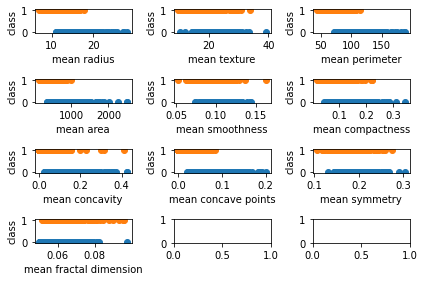

<Figure size 432x288 with 0 Axes>

In [4]:
# View mean features

fig, axes = plt.subplots(4,3)

for i in range(4):
    for j in range(3):
        k = 3*i + j  # Feature number
        
        if k < 10:
            axes[i][j].scatter(features[labels==0, k], labels[labels==0], label="Malignant")
            axes[i][j].scatter(features[labels==1, k], labels[labels==1], label="Benign")
        
            axes[i][j].set_xlabel(feature_names[k])
            axes[i][j].set_ylabel("class")
            
fig.tight_layout()
plt.show()     
plt.clf()

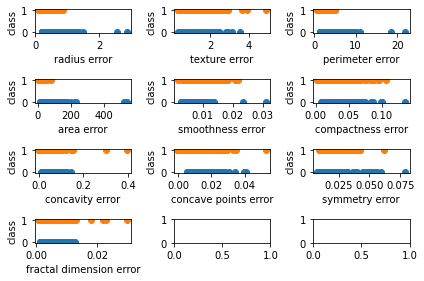

<Figure size 432x288 with 0 Axes>

In [5]:
# View standard error features

fig, axes = plt.subplots(4,3)

for i in range(4):
    for j in range(3):
        k = 3*i + j + 10  # Feature number
        
        if k < 20:
            axes[i][j].scatter(features[labels==0, k], labels[labels==0], label="Malignant")
            axes[i][j].scatter(features[labels==1, k], labels[labels==1], label="Benign")
        
            axes[i][j].set_xlabel(feature_names[k])
            axes[i][j].set_ylabel("class")
            
fig.tight_layout()
plt.show()     
plt.clf()

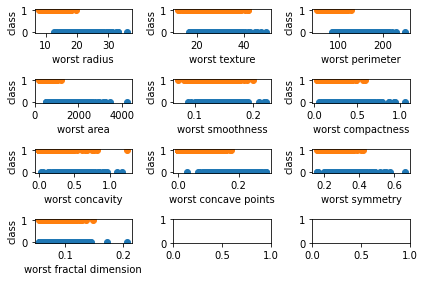

<Figure size 432x288 with 0 Axes>

In [6]:
# View worst features

fig, axes = plt.subplots(4,3)

for i in range(4):
    for j in range(3):
        k = 3*i + j + 20  # Feature number
        
        if k < 30:
            axes[i][j].scatter(features[labels==0, k], labels[labels==0], label="Malignant")
            axes[i][j].scatter(features[labels==1, k], labels[labels==1], label="Benign")
        
            axes[i][j].set_xlabel(feature_names[k])
            axes[i][j].set_ylabel("class")
            
fig.tight_layout()
plt.show()     
plt.clf()

## Perform Principal Component Analysis (PCA) in 2-dimensions
PCA uses Singular Value Decomposition (SVD) at its heart.

In [7]:
from sklearn.decomposition import PCA

# PCA in 2-dimensions
pca = PCA(n_components=2)
pca_features_2d = pca.fit_transform(features)

# print("Components:\n", pca.components_, "\n")
# print("Explained variance:\n", pca.explained_variance_, "\n")
print("Explained variance ratio:\n", pca.explained_variance_ratio_, "\n")
print("PCA Features:\n", pca_features_2d, "\n")
print("PCA Features Shape:", pca_features_2d.shape)

Explained variance ratio:
 [0.98204467 0.01617649] 

PCA Features:
 [[1160.1425737  -293.91754364]
 [1269.12244319   15.63018184]
 [ 995.79388896   39.15674324]
 ...
 [ 314.50175618   47.55352518]
 [1124.85811531   34.12922497]
 [-771.52762188  -88.64310636]] 

PCA Features Shape: (569, 2)


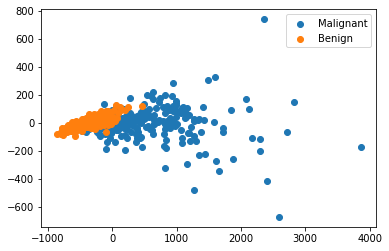

<Figure size 432x288 with 0 Axes>

In [8]:
# Plot PCA Features
plt.scatter(pca_features_2d[labels==0, 0], pca_features_2d[labels==0, 1], label="Malignant")
plt.scatter(pca_features_2d[labels==1, 0], pca_features_2d[labels==1, 1], label="Benign")
plt.legend()
plt.show()
plt.clf()

## Perform PCA in 3-dimensions

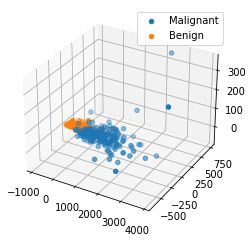

<Figure size 432x288 with 0 Axes>

In [9]:
# PCA in 3-dimensions
pca = PCA(n_components=3)
pca_features_3d = pca.fit_transform(features)


# Plot PCA Features
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(pca_features_3d[labels==0, 0], pca_features_3d[labels==0, 1], pca_features_3d[labels==0, 2], label="Malignant")
ax.scatter(pca_features_3d[labels==1, 0], pca_features_3d[labels==1, 1], pca_features_3d[labels==1, 2], label="Benign")
plt.legend()
plt.show()
plt.clf()

## SVM Classification on 2D PCA features

In [10]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(pca_features_2d, labels, test_size=0.2)

clf = svm.SVC(kernel="linear")
# clf = svm.SVC(kernel="rbf")
clf.fit(Xtrain, Ytrain)
Ptrain = clf.predict(Xtrain)
Ptest = clf.predict(Xtest)

train_accuracy = np.mean(np.equal(Ptrain, Ytrain).astype(float))
test_accuracy = np.mean(np.equal(Ptest, Ytest).astype(float))

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Train accuracy: 0.9318681318681319
Test accuracy: 0.9122807017543859


## SVM Classification on 3D PCA features

In [11]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(pca_features_3d, labels, test_size=0.2)

clf = svm.SVC(kernel="linear")
# clf = svm.SVC(kernel="rbf")
clf.fit(Xtrain, Ytrain)
Ptrain = clf.predict(Xtrain)
Ptest = clf.predict(Xtest)

train_accuracy = np.mean(np.equal(Ptrain, Ytrain).astype(float))
test_accuracy = np.mean(np.equal(Ptest, Ytest).astype(float))

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Train accuracy: 0.9318681318681319
Test accuracy: 0.9473684210526315


## Higher-dimensional PCA + SVM Classification

In [12]:
# PCA in higher dimensions
pca = PCA(n_components=10)
pca_features = pca.fit_transform(features)

# Split dataset
Xtrain, Xtest, Ytrain, Ytest = train_test_split(pca_features, labels, test_size=0.2)

# Train SVM
clf = svm.SVC(kernel="linear")
# clf = svm.SVC(kernel="rbf")
clf.fit(Xtrain, Ytrain)
Ptrain = clf.predict(Xtrain)
Ptest = clf.predict(Xtest)

# Compute accuracy
train_accuracy = np.mean(np.equal(Ptrain, Ytrain).astype(float))
test_accuracy = np.mean(np.equal(Ptest, Ytest).astype(float))

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Train accuracy: 0.967032967032967
Test accuracy: 0.9473684210526315
